# 3. Linear Regression

## 3.9 Multiple Linear Regression

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set(style="white")
plt.rcdefaults()

df = pd.read_csv('../data/Auto.csv')
df = pd.read_csv('../data/Auto.csv', na_values='?').dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


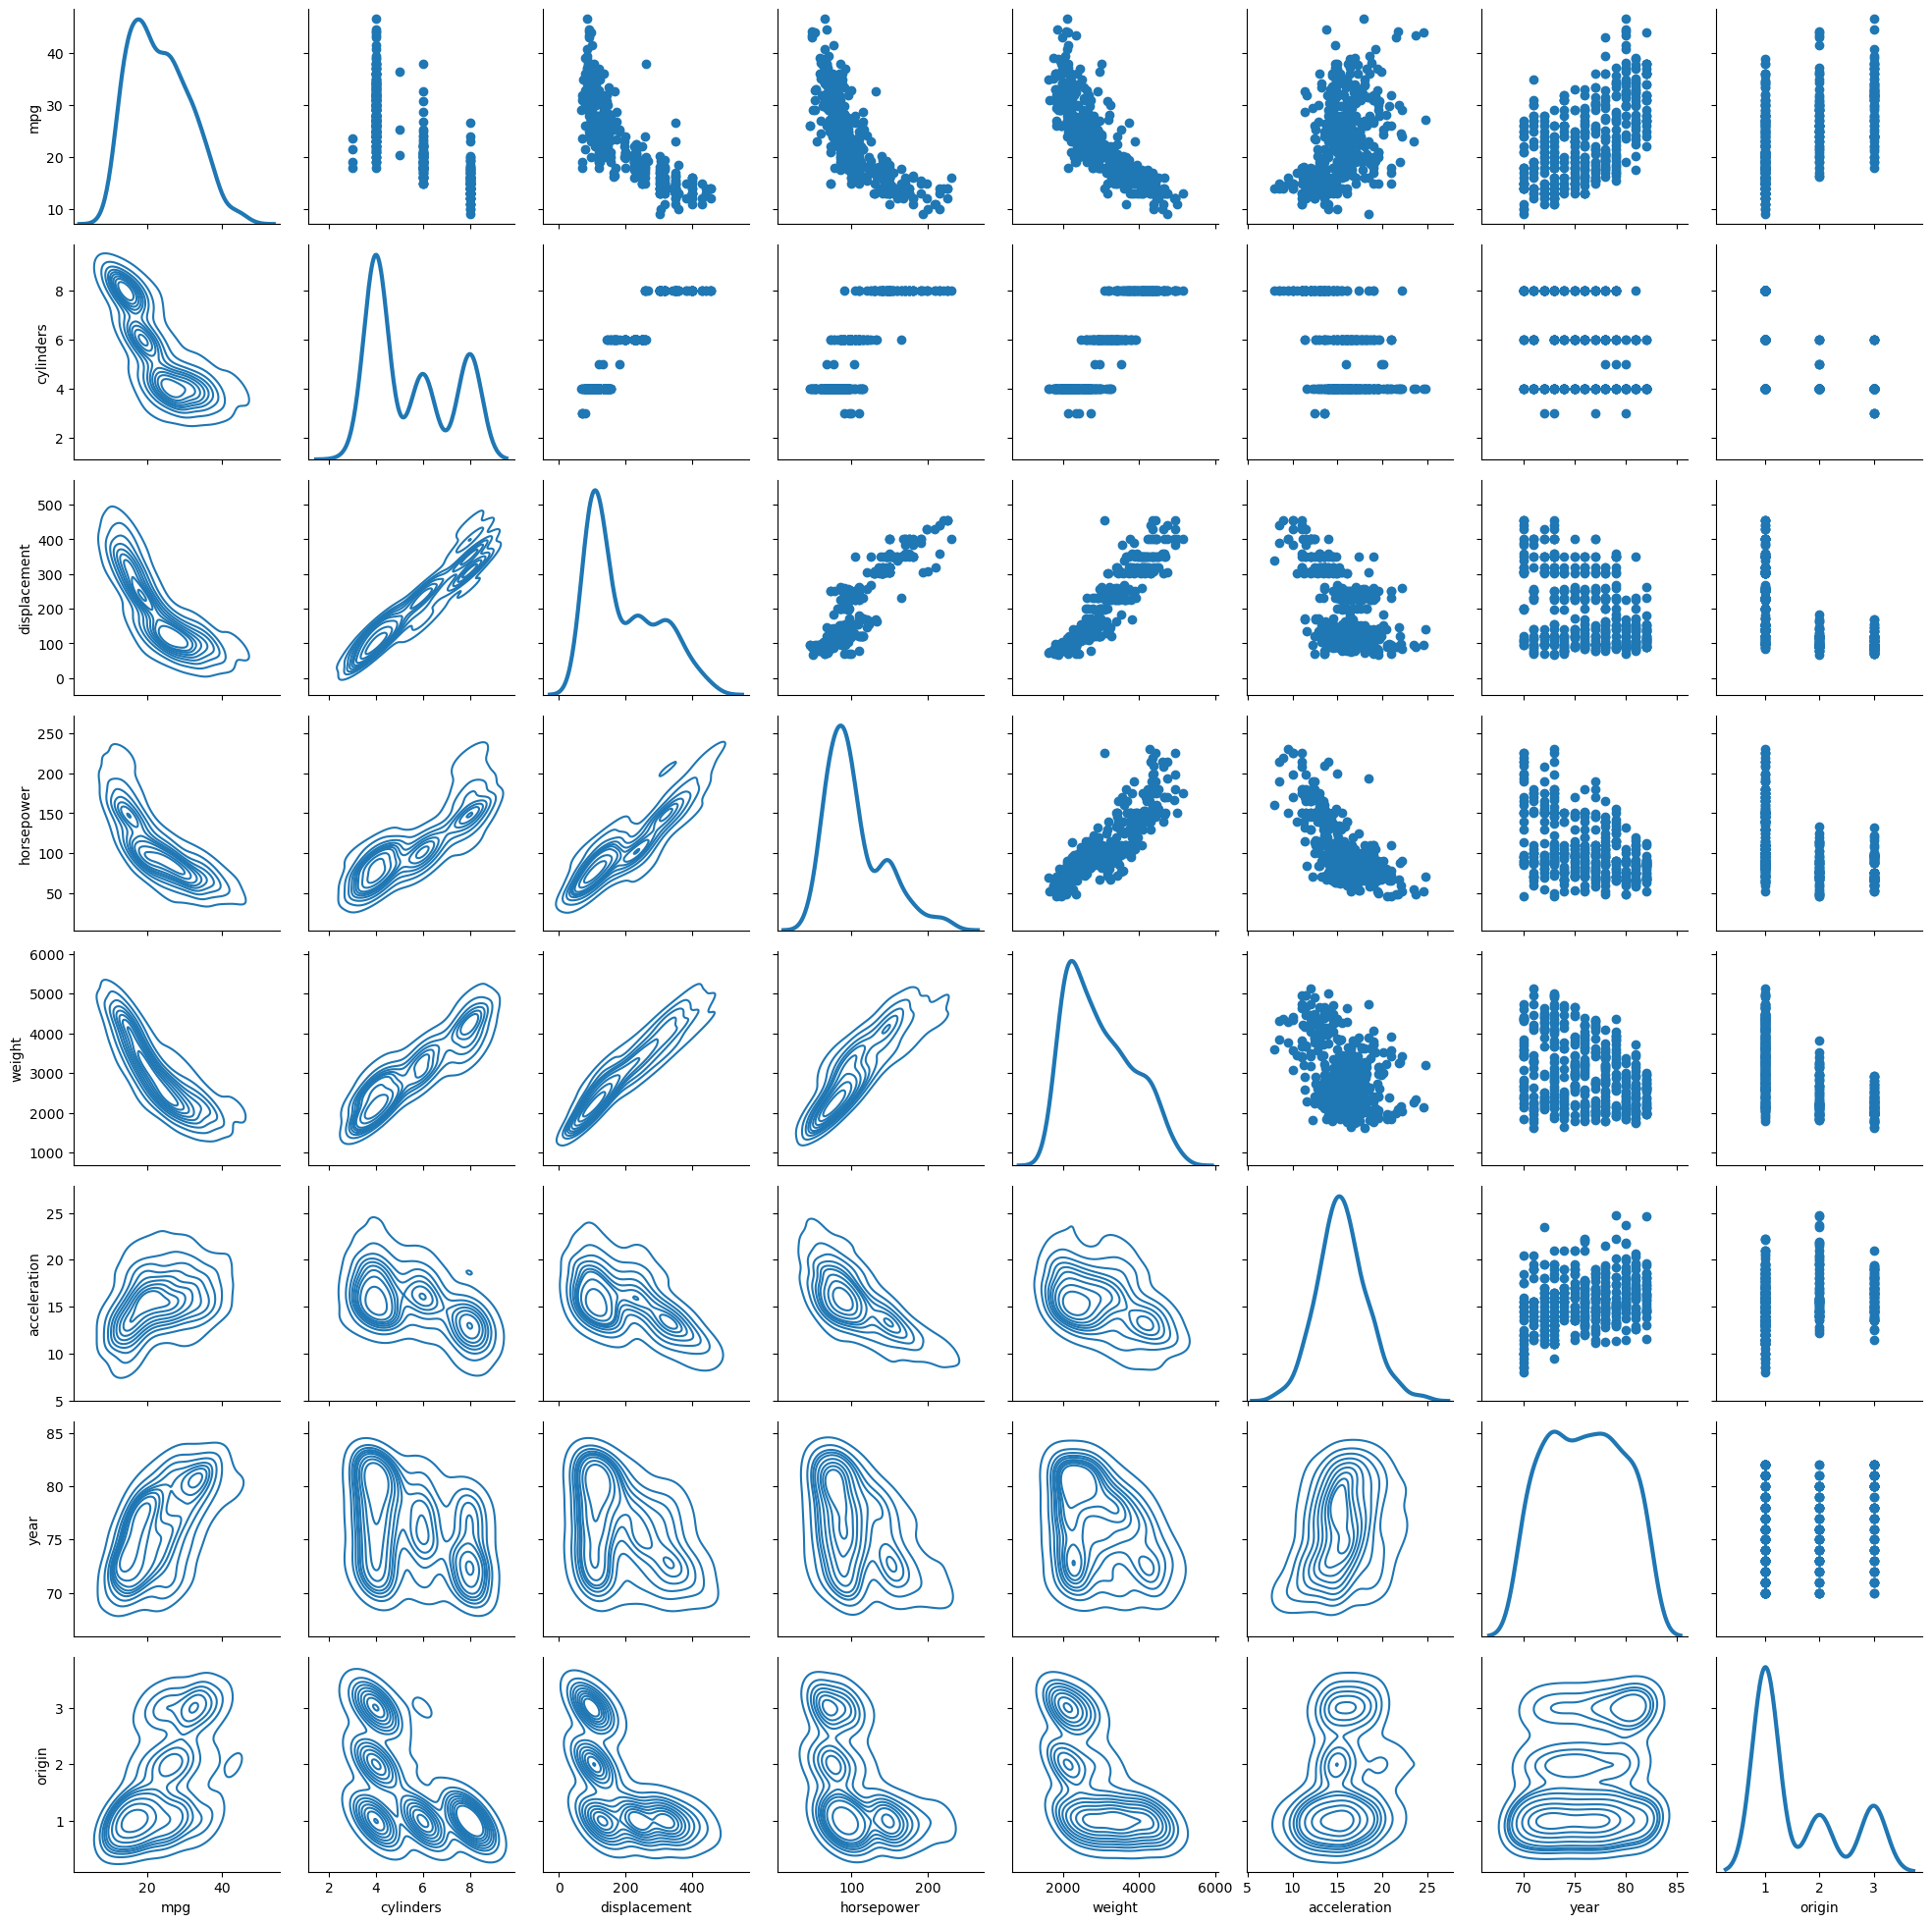

In [6]:
# a
# http://seaborn.pydata.org/generated/seaborn.PairGrid.html

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [8]:
# b
# pandas' corr() function takes care of excluding non numeric data: 
# https://github.com/pandas-dev/pandas/blob/v0.19.2/pandas/core/frame.py#L4721

df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


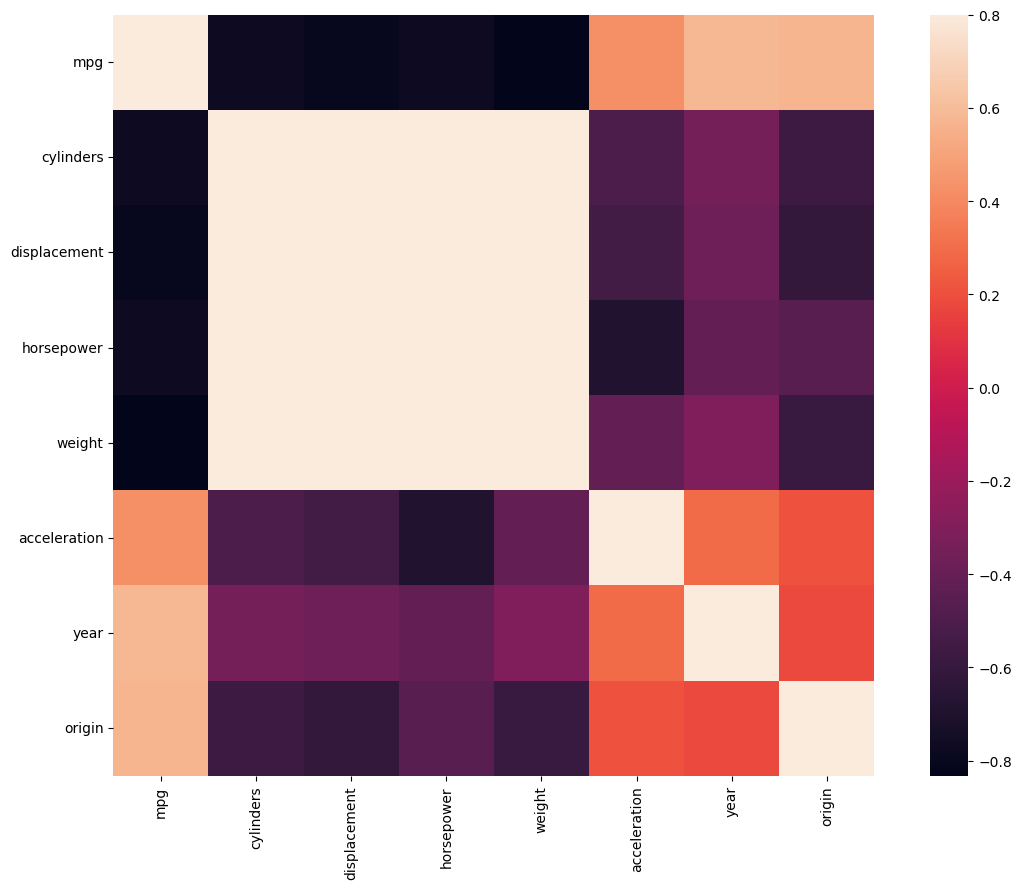

In [9]:
# Heatmap

corrmat = df.corr(numeric_only=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

In [10]:
# c

reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.04e-139
Time:                        21:48:10   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# e

reg = smf.ols('mpg ~ horsepower*year + displacement + weight + origin', df).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     367.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.51e-156
Time:                        21:56:09   Log-Likelihood:                -987.81
No. Observations:                 392   AIC:                             1990.
Df Residuals:                     385   BIC:                             2017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -96.6688      9.667    -10.000      0.000    -115.675     -77.663
horsepower          0.7993      0.092      8.687      0.000       0.618       0.980
year                1.8179      0.128     14.221      0.000       1.567       2.069
horsepower:year    -0.0113      0.001     -8.977      0.000      -0.014      -0.009
displacement        0.0068      0.005      1.344      0.180      -0.003       0.017
weight             -0.0054      0.001    -10.170      0.000      -0.006      -0.004
origin              1.1866      0.253      4.684      0.000       0.688       1.685
==============================================================================
Omnibus:                       21.932   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.066
Skew:                           0.411   Prob(JB):                     6.60e-08
Kurtosis:                       4.161   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model = 'mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year'
reg = smf.ols(model, df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.09e-162
Time:                        21:56:40   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -51.3746     26.175     -1.963      0.050    -102.843       0.093
displacement               -0.1818      0.120     -1.521      0.129      -0.417       0.053
horsepower                  0.9485      0.232      4.089      0.000       0.492       1.405
origin                     -3.0637      5.496     -0.557      0.578     -13.871       7.744
weight                     -0.0174      0.016     -1.115      0.265      -0.048       0.013
year                        1.3975      0.328      4.267      0.000       0.754       2.042
displacement:horsepower    -0.0001      0.000     -0.815      0.416      -0.000       0.000
displacement:origin         0.0282      0.013      2.172      0.030       0.003       0.054
displacement:weight      2.792e-05   5.99e-06      4.663      0.000    1.61e-05    3.97e-05
displacement:year           0.0010      0.001      0.710      0.478      -0.002       0.004
horsepower:origin          -0.0629      0.020     -3.104      0.002      -0.103      -0.023
horsepower:weight       -1.175e-05   1.77e-05     -0.664      0.507   -4.65e-05     2.3e-05
horsepower:year            -0.0114      0.003     -3.998      0.000      -0.017      -0.006
origin:weight               0.0014      0.001      1.200      0.231      -0.001       0.004
origin:year                 0.0322      0.069      0.464      0.643      -0.104       0.169
weight:year              7.438e-05      0.000      0.394      0.694      -0.000       0.000
==============================================================================
Omnibus:                       52.658   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.208
Skew:                           0.710   Prob(JB):                     9.61e-26
Kurtosis:                       5.244   Cond. No.                     1.81e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# f

reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.11e-157
Time:                        21:56:58   Log-Likelihood:                -988.57
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     386   BIC:                             2013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.6457      3.915     -1.698      0.090     -14.343       1.052
horsepower                 -0.2441      0.027     -9.099      0.000      -0.297      -0.191
np.power(horsepower, 2)     0.0008   9.13e-05      9.170      0.000       0.001       0.001
weight                     -0.0044      0.000    -10.426      0.000      -0.005      -0.004
year                        0.7456      0.046     16.145      0.000       0.655       0.836
origin                      1.0465      0.238      4.405      0.000       0.579       1.514
==============================================================================
Omnibus:                       21.819   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.447
Skew:                           0.414   Prob(JB):                     9.00e-08
Kurtosis:                       4.140   Cond. No.                     4.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""